Загрузите данные по изменению температуры поверхности земли. Для этого может понадобится зарегистрироваться на Kaggle. Затем нужно будет работать с данными, которые содержатся в файле GlobalLandTemperaturesByMajorCity.csv

In [1]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


Задание 3.1 (1 балл)
В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый DataFrame, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.

In [2]:
df_1950 = df[df["dt"] >= "1950-01-01"]
print('-----------------------------------------------------------','\nЗадача 1：')
df_1950.head()


----------------------------------------------------------- 
Задача 1：


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


Задание 3.2 (2 балла)
Постройте график среднегодовых температур в городе Торонто.

C:\Users\bshsb\AppData\Local\Temp\ipykernel_8236\2368375805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Toronto['dt'] = pd.to_datetime(df_Toronto['dt'])
C:\Users\bshsb\AppData\Local\Temp\ipykernel_8236\2368375805.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Toronto['dt'] = df['dt'].dt.year


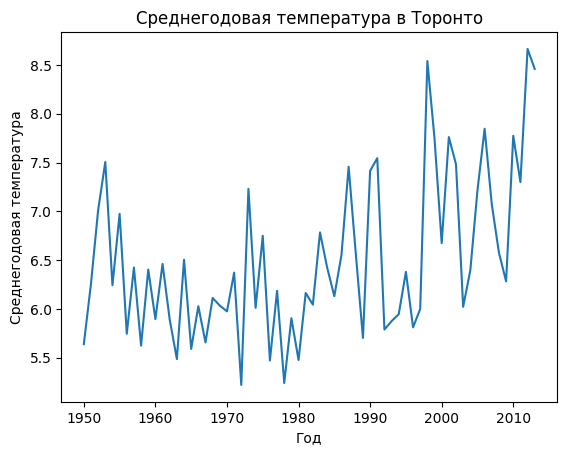

,dt,AverageTemperature
0,1950,5.639583
1,1951,6.259083
2,1952,7.013417
3,1953,7.506250
4,1954,6.243083
...,...,...
59,2009,6.282583
60,2010,7.774500
61,2011,7.299583
62,2012,8.664667


In [3]:
# Получим список значений температуры в Торонто
df_Toronto= df_1950[df_1950["City"] == "Toronto"]
df_Toronto['dt'] = pd.to_datetime(df_Toronto['dt'])


df_Toronto['dt'] = df['dt'].dt.year
df_Toronto= df_Toronto.groupby('dt')['AverageTemperature'].mean().reset_index()

plt.plot(df_Toronto['dt'], df_Toronto['AverageTemperature'])
plt.xlabel('Год')
plt.ylabel('Среднегодовая температура')
plt.title('Среднегодовая температура в Торонто')
plt.show()

df_Toronto



Задание 3.3 (2 балла)
Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна.

In [4]:
3.3

# Вычисление выборочной дисперсии по группам
variance = df_1950.groupby('City')['AverageTemperature'].var()

# Нахождение города с максимальной выборочной дисперсией
city_max_variance = variance.idxmax()

print("Город с максимальной выборочной дисперсией температур:", city_max_variance)

Город с максимальной выборочной дисперсией температур: Harbin


Задание 3.4 (4 балла)
На одной оси постройте графики, отображающие:
1.Зависимость выборочной дисперсии температур от широты города (Latitude).
2.Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3.Зависимость средней температуры в июле 1975 года от широты города (Latitude).

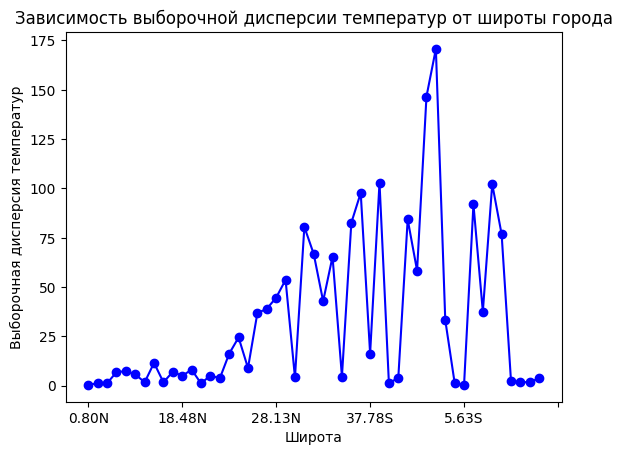

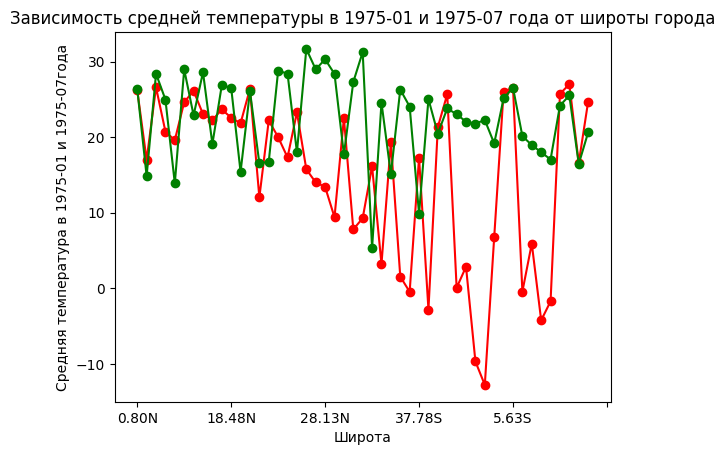

In [5]:
#3.4.1
# 1. Зависимость выборочной дисперсии температур от широты города
variance = df_1950.groupby('Latitude')['AverageTemperature'].var()
variance.plot(marker='o', linestyle='-', color='blue')
plt.xlabel('Широта')
plt.ylabel('Выборочная дисперсия температур')
plt.title('Зависимость выборочной дисперсии температур от широты города')
plt.show()
#2. Зависимость средней температуры в январе 1975 года от широты города

january_temp = df_1950[df_1950['dt'] == '1975-01-01']
january_mean_temp = january_temp.groupby('Latitude')['AverageTemperature'].mean()
january_mean_temp.plot(marker='o', linestyle='-', color='red')
plt.xlabel('Широта')
plt.ylabel('Средняя температура в январе 1975.01 года')
plt.title('Зависимость средней температуры в 1975.01 года от широты города')


#Зависимость средней температуры в июле 1975 года от широты города
january_temp = df_1950[df_1950['dt'] == '1975-07-01']
january_mean_temp = january_temp.groupby('Latitude')['AverageTemperature'].mean()
january_mean_temp.plot(marker='o', linestyle='-', color='green')
plt.xlabel('Широта')
plt.ylabel('Средняя температура в 1975-01 и 1975-07года')
plt.title('Зависимость средней температуры в 1975-01 и 1975-07 года от широты города')

plt.show()


Задание 3.5 (6 баллов) 
Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом) 
Постройте модель линейной регрессии (можно использовать LinearRegression); г о д — с р е д н я ят е м п е р а т у р а Отобразите прямую на предыдущем графике.

In [6]:
df_Saint_Petersburg= df_1950[df_1950["City"] == "Saint Petersburg"]


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



df_Saint_Petersburg.head()



,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
195915,1950-01-01,-13.053,0.665,Saint Petersburg,Russia,60.27N,29.19E
195916,1950-02-01,-5.829,0.255,Saint Petersburg,Russia,60.27N,29.19E
195917,1950-03-01,-2.812,0.398,Saint Petersburg,Russia,60.27N,29.19E
195918,1950-04-01,5.366,0.384,Saint Petersburg,Russia,60.27N,29.19E
195919,1950-05-01,8.655,0.300,Saint Petersburg,Russia,60.27N,29.19E


C:\Users\bshsb\AppData\Local\Temp\ipykernel_8236\2820111816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Saint_Petersburg["mean_temperature"] = df_Saint_Petersburg["AverageTemperature"].mean()
C:\Users\bshsb\AppData\Local\Temp\ipykernel_8236\2820111816.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Saint_Petersburg['dt'] = pd.to_datetime(df_Saint_Petersburg['dt'])
C:\Users\bshsb\AppData\Local\Temp\ipykernel_8236\2820111816.py:12: SettingWithCopyWarning: 
A value is trying to be set on a co

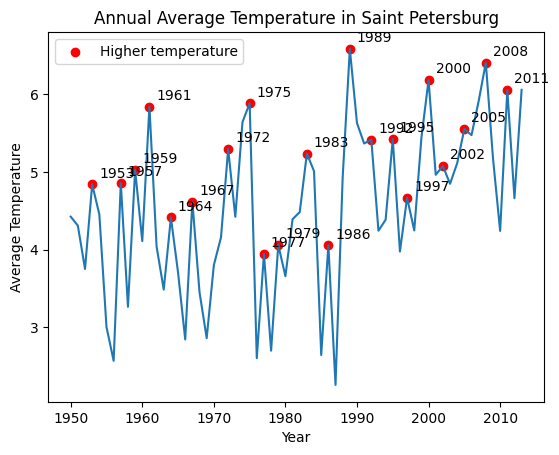

In [7]:
# Расчетная средняя температура
df_Saint_Petersburg["mean_temperature"] = df_Saint_Petersburg["AverageTemperature"].mean()

import pandas as pd
import matplotlib.pyplot as plt


# Преобразовать поле даты в тип Datetime
df_Saint_Petersburg['dt'] = pd.to_datetime(df_Saint_Petersburg['dt'])

# Поле года извлечения
df_Saint_Petersburg['year'] = df_Saint_Petersburg['dt'].dt.year

average_temperatures = df_Saint_Petersburg.groupby('year')['AverageTemperature'].mean()

# Определите годы, когда средняя температура была выше, чем в предыдущем и последующем годах.
higher_temperatures = average_temperatures[(average_temperatures.shift() < average_temperatures) &
                                           (average_temperatures.shift(-1) < average_temperatures)]


# Картирование среднегодовой температуры

for year in higher_temperatures.index:
    temperature = higher_temperatures[year]
    plt.annotate(str(year), xy=(year, temperature), xytext=(5, 5), textcoords='offset points')

plt.plot(average_temperatures.index, average_temperatures.values)
plt.scatter(higher_temperatures.index, higher_temperatures.values, color='r', label='Higher temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Annual Average Temperature in Saint Petersburg')
plt.legend()
plt.show()





Задание 3.6 (4 балла)
Найдите города, для которых:
1.Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2.Самая большая средняя разница между средней температурой января и средней температурой июля.
3.Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [8]:
df_1950

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [9]:
import pandas as pd
import numpy as np

# Расчет разницы в среднегодовой температуре в каждом городе
df_1950['Year'] = pd.to_datetime(df_1950['dt']).dt.year
mean_temp_by_year = df_1950.groupby(['City', 'Year'])['AverageTemperature'].mean().reset_index()

df_1950['Annual Mean Difference'] = mean_temp_by_year.groupby('City')['AverageTemperature'].diff().abs().max()

# Найдите город с самой большой разницей в среднегодовой температуре
max_mean_diff_city = df_1950.groupby('City')['Annual Mean Difference'].idxmax()
max_mean_diff_city = df_1950.loc[max_mean_diff_city]['City'].values[0]
print("Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна：" + max_mean_diff_city)


# Расчет разницы между средней температурой в январе и июле в каждом городе
df_1950['Month'] = pd.to_datetime(df_1950['dt']).dt.month
jan_avg_temp = df_1950[df_1950['Month'] == 1].groupby('City')['AverageTemperature'].mean()
jul_avg_temp = df_1950[df_1950['Month'] == 7].groupby('City')['AverageTemperature'].mean()

# Храните разницу между средней температурой января и июля в DataFrame
temp_diff_df = pd.DataFrame({
    'City': jan_avg_temp.index,
    'Jan Average Temperature': jan_avg_temp.values,
    'Jul Average Temperature': jul_avg_temp.values,
    'Temp Difference': jan_avg_temp.values - jul_avg_temp.values
})

# Найдите города с наибольшей разницей в средних температурах января и июля
max_temp_diff_city = temp_diff_df.loc[temp_diff_df['Temp Difference'].idxmax()]['City']
print("Самая большая средняя разница между средней температурой января и средней температурой июля：" + max_temp_diff_city)



df_1950['Year'] = pd.to_datetime(df_1950['dt']).dt.year

negative_temps = df_1950[df_1950['AverageTemperature'] < 0]

result = negative_temps.groupby(['Year', 'City']).size().reset_index(name='NegativeMonths')

most_negative_city_per_year = result.groupby('Year').apply(lambda x: x.loc[x['NegativeMonths'].idxmax()]['City']).reset_index(name='MostNegativeCity')

# Названы города с наибольшим количеством месяцев с отрицательными температурами в год
most_negative_city = most_negative_city_per_year.groupby('MostNegativeCity').size().idxmax()

print('Наибольшее среднее количество месяцев с отрицательной температурой в году: '+most_negative_city)

Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна：Abidjan
Самая большая средняя разница между средней температурой января и средней температурой июля：Santiago
Наибольшее среднее количество месяцев с отрицательной температурой в году: Changchun


C:\Users\bshsb\AppData\Local\Temp\ipykernel_8236\3097942624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1950['Year'] = pd.to_datetime(df_1950['dt']).dt.year
C:\Users\bshsb\AppData\Local\Temp\ipykernel_8236\3097942624.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1950['Annual Mean Difference'] = mean_temp_by_year.groupby('City')['AverageTemperature'].diff().abs().max()
C:\Users\bshsb\AppData\Local\Temp\ipykernel_8236\3097942624.py:17: SettingWithCopyWarning: 
A value is trying to be set o

Задание 3.7 (3 балла)
Отобразите города на карте, например с помощью geopandas/folium или plotly. Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет.

***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании 3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой.

*****(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку pwlf с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента.

In [10]:
df_1950

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Annual Mean Difference,Month
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,3.362917,1
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,3.362917,2
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,3.362917,3
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,3.362917,4
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W,1950,3.362917,5
...,...,...,...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E,2013,3.362917,5
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E,2013,3.362917,6
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E,2013,3.362917,7
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E,2013,3.362917,8


In [11]:
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pwlf

data = df_1950.copy()
data['Year'] = pd.to_datetime(data['dt']).dt.year

data = data[data['Year'] >= 2004]
data = data[data['Month'] == 1]
data = data.groupby(['City', 'Year','Latitude','Longitude'])['AverageTemperature'].mean().reset_index()
data.rename(columns={'AverageTemperature': 'jan_temp'}, inplace=True)
data



,City,Year,Latitude,Longitude,jan_temp
0,Abidjan,2004,5.63N,3.23W,27.728
1,Abidjan,2005,5.63N,3.23W,26.715
2,Abidjan,2006,5.63N,3.23W,27.596
3,Abidjan,2007,5.63N,3.23W,27.120
4,Abidjan,2008,5.63N,3.23W,26.061
...,...,...,...,...,...
995,Xian,2009,34.56N,108.97E,-1.516
996,Xian,2010,34.56N,108.97E,-0.237
997,Xian,2011,34.56N,108.97E,-4.811
998,Xian,2012,34.56N,108.97E,-2.416


In [12]:
colors = []
for city in data['City']:
    x = data[data['City'] == city]['Year'].values.reshape(-1, 1)
    y = data[data['City'] == city]['jan_temp'].values

    reg = LinearRegression().fit(x, y)
    slope = reg.coef_[0]
    angle = np.degrees(np.arctan(slope))

    colors.append(angle)

norm = mcolors.Normalize(vmin=min(colors), vmax=max(colors))
cmap = plt.cm.get_cmap('coolwarm')

data['Color'] = colors
data['Color'] = data['Color'].apply(lambda x: mcolors.rgb2hex(cmap(norm(x))) if pd.notnull(x) else '#ffffff')

data

C:\Users\bshsb\AppData\Local\Temp\ipykernel_8236\1694387443.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


,City,Year,Latitude,Longitude,jan_temp,Color
0,Abidjan,2004,5.63N,3.23W,27.728,#f5c0a7
1,Abidjan,2005,5.63N,3.23W,26.715,#f5c0a7
2,Abidjan,2006,5.63N,3.23W,27.596,#f5c0a7
3,Abidjan,2007,5.63N,3.23W,27.120,#f5c0a7
4,Abidjan,2008,5.63N,3.23W,26.061,#f5c0a7
...,...,...,...,...,...,...
995,Xian,2009,34.56N,108.97E,-1.516,#d7dce3
996,Xian,2010,34.56N,108.97E,-0.237,#d7dce3
997,Xian,2011,34.56N,108.97E,-4.811,#d7dce3
998,Xian,2012,34.56N,108.97E,-2.416,#d7dce3


In [13]:
# Создать карту
m = folium.Map(location=[0, 0], zoom_start=2)

# Создать компонент кластера меток
marker_cluster = MarkerCluster().add_to(m)

# Очистить данные
data['Latitude'] = data['Latitude'].str.replace(r'[^0-9\.]', '', regex=True)
data['Longitude'] = data['Longitude'].str.replace(r'[^0-9\.]', '', regex=True)
# Преобразование в число с плавающей запятой
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)

# Добавить городской знак на карту
for index, row in data.iterrows():
    Latitude = row['Latitude']  
    Longitude = row['Longitude']  

    folium.Marker([Latitude, Longitude], 
                  popup=row['City'], 
                  icon=folium.Icon(icon='cloud', color=row['Color'])
                 ).add_to(marker_cluster)

# Показать карту
m

C:\Users\bshsb\AppData\Local\Temp\ipykernel_8236\708502724.py:21: UserWarning: color argument of Icon should be one of: {'black', 'blue', 'darkpurple', 'lightred', 'purple', 'darkblue', 'lightblue', 'green', 'gray', 'beige', 'orange', 'lightgreen', 'red', 'darkred', 'cadetblue', 'darkgreen', 'white', 'pink', 'lightgray'}.
  icon=folium.Icon(icon='cloud', color=row['Color'])


In [14]:
# Расчет разницы в среднегодовой температуре в каждом городе
df_1950['Year'] = pd.to_datetime(df_1950['dt']).dt.year
mean_temp_by_year = df_1950.groupby(['City', 'Year'])['AverageTemperature'].mean().reset_index()
mean_temp_by_year

C:\Users\bshsb\AppData\Local\Temp\ipykernel_8236\2023380372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1950['Year'] = pd.to_datetime(df_1950['dt']).dt.year


,City,Year,AverageTemperature
0,Abidjan,1950,26.195417
1,Abidjan,1951,26.324750
2,Abidjan,1952,26.279500
3,Abidjan,1953,26.244417
4,Abidjan,1954,26.011083
...,...,...,...
6395,Xian,2009,12.528417
6396,Xian,2010,12.589750
6397,Xian,2011,12.075167
6398,Xian,2012,11.898167


In [16]:
#for City in mean_temp_by_year.index:
  #  Расчетная прямая среднегодового изменения температуры
X = mean_temp_by_year['Year'].values.reshape(-1, 1)
Y = mean_temp_by_year['AverageTemperature'].values.reshape(-1, 1)
regression = LinearRegression().fit(X,Y)
slope = regression.coef_[0][0]

# Использовать библиотеку PWLF для вычисления наклона последнего сегмента
data = mean_temp_by_year.sort_values('Year')
x = data['Year']
y = data['AverageTemperature']
my_pwlf = pwlf.PiecewiseLinFit(x, y)
my_pwlf.fit(5)  
slope_last_segment = my_pwlf.slopes[-1]

# Результаты печати
print(f"Тенденции изменения среднегодовой температуры：{slope}")
print(f"Наклон последнего абзаца：{slope_last_segment}")


Тенденции изменения среднегодовой температуры：0.016201492759844328
Наклон последнего абзаца：0.6696162084126976
